In [1]:
import math
import timeit
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from timeit import Timer

In [2]:
def basic(x, y, n):
    if (n == 1): return x * y

    m = math.ceil(n / 2)
    a = math.floor(x / pow(2, m))
    b = x % pow(2, m)
    c = math.floor(y / pow(2, m))
    d = y % pow(2, m)
    e = basic(a, c, m)
    f = basic(b, d, m)
    g = basic(b, c, m)
    h = basic(a, d, m)

    return (pow(2, 2 * m) * e) + (pow(2, m) * (g + h)) + f

def karatsuba(x, y, n):
    if (n == 1): return x * y
    
    m = math.ceil(n / 2)
    a = math.floor(x / pow(2, m))
    b = x % pow(2, m)
    c = math.floor(y / pow(2, m))
    d = y % pow(2, m)
    e = karatsuba(a, c, m)
    f = karatsuba(b, d, m)
    g = karatsuba(abs(a - b), abs(c - d), m)
    
    return (pow(2, 2 * m) * e) + (pow(2, m) * (e + f - g)) + f

In [3]:
tb = []
td = []
tk = []
    
for i in range(1, 1000, 11):
    r = pow(i, 2)
    l = len(str(abs(r)))
    
    x = r
    y = r
    
    rb = Timer(lambda: x * y)
    tb.append(rb.timeit(number=1))

    rd = Timer(lambda: basic(x, y, l))
    td.append(rd.timeit(number=1))

    rk = Timer(lambda: karatsuba(x, y, l))
    tk.append(rb.timeit(number=1))

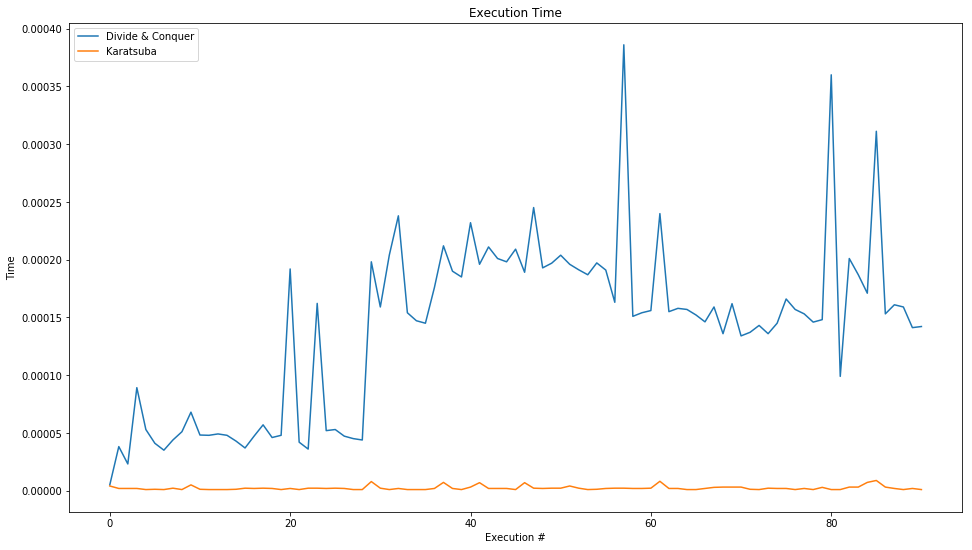

In [4]:
plt.rcParams["figure.figsize"] = [16,9]
# plt.plot(tb, label="Basic")
plt.plot(td, label="Divide & Conquer")
plt.plot(tk, label="Karatsuba")
plt.legend(loc="upper left")
plt.title("Execution Time")
plt.xlabel("Execution #")
plt.ylabel("Time")
plt.show()